In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import function
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('../VisitorEntrancesV3.xlsx')

In [3]:
df = df[df.Site_Name=='The Masada']
df = function.remove_unique_one(df)
df = df.drop(df.filter(regex='Season').columns, axis=1)
df = df.drop(df.filter(regex='Exceeded').columns, axis=1)
df = df.drop(df.filter(regex='isHeatwave').columns, axis=1)
df = df.replace({True:1,False:0})

In [4]:
dfWithoutLastYearVisits = df.dropna().drop('last_year_visitors',axis=1)
dfLastYearVisits = df.dropna()

In [10]:
print(df.shape)
print(dfLastYearVisits.shape)
print(dfWithoutLastYearVisits.shape)

(1387, 8)
(1011, 8)
(1011, 7)


In [7]:
resTrain,resTest,coeffDf = function.mlrModelResTrainTestCoeff(dfLastYearVisits)

C:\Users\Avivsa\AppData\Local\Temp\ipykernel_21020\1564167282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True)


In [ ]:
print(coeffDf)
print()

                             0
Temperature         -488.41952
IsVacation          -435.53464
is_weekend          -127.55243
pm10                  64.07809
IsHoliday            177.73131
last_year_visitors  1491.36468

rmse 691.0328710086147
std 809.1665472718446


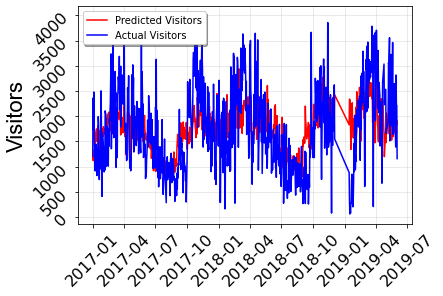

Sample rows:
             Prediction  Actual
Date                           
2019-01-23  2266.852975     578
2018-11-21  1954.468320    2426
2018-05-19  1714.310732    1430
2019-05-20  1897.759770    3464
2018-10-01  1752.982138    1193
2017-07-24   893.528530     451
2017-06-10  1438.853455    1617
2019-05-13  1786.875286    2019
2018-09-15  1614.592193     557
2017-05-11  1590.585907    1787

rmse 642.6634061847436
std 782.933047432456


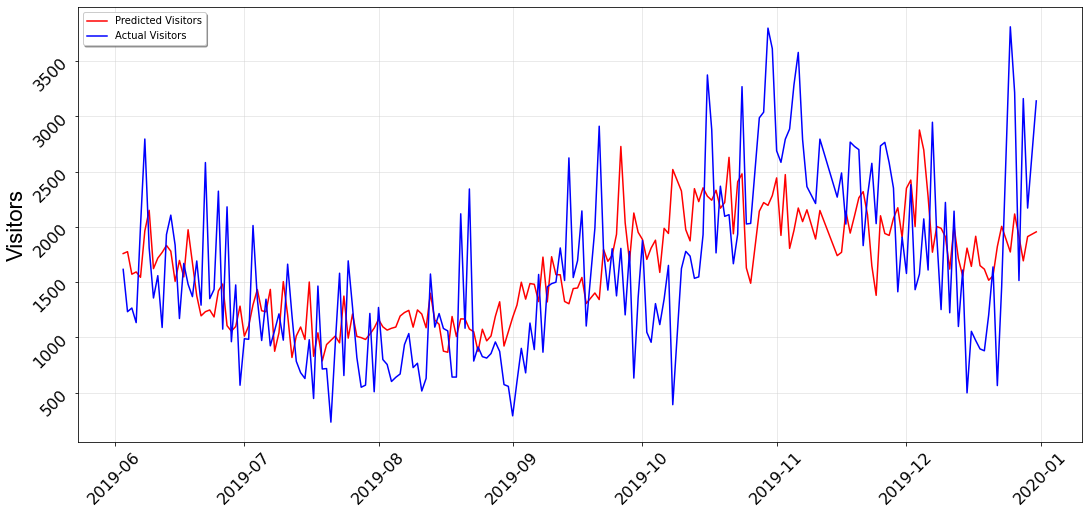

Sample rows:
             Prediction  Actual
Date                           
2019-07-30  1027.657985    1216
2019-10-07  1940.027126    1651
2019-10-21  2629.151957    2110
2019-11-05  1966.907717    3284
2019-10-12  1872.888308    1735
2019-08-21  1165.276677    1082
2019-06-20  1375.417866    1691
2019-11-03  2472.673823    2793
2019-11-27  1922.388711    2581
2019-09-26  2727.563285    1805


In [8]:
function.printRes(resTrain)
print()

function.printRes(resTest)

In [9]:
resTrain,resTest,coeffDf = function.mlrModelResTrainTestCoeff(dfEnGediWithoutLastYearVisits)
print(coeffDf)
print()

function.printRes(resTrain)
print()

function.printRes(resTest)

NameError: name 'dfEnGediWithoutLastYearVisits' is not defined